# Imports & Downloads

In [1]:
# Do not depend on numpy
import re
from string import punctuation

* Latest version of spaCy uses numpy > 2.0.0
* Latest version of nltk uses numpy < 2.0.0
* Solution: assert use of numpy 1.* and spaCy < 3.7.x

In [2]:
# Check if numpy installed
res = ! pip freeze | grep numpy
res = re.findall(r"(?<=\=\=)[\d.*\.?]+", str(res))
numpyInstalled = len(res) == 1

# check version
if(numpyInstalled):
    reinstallNumpy = int(res[0][0]) > 1
    if(reinstallNumpy):
        print("Numpy version >= 2.*: Reinstalling numpy 1.*\n")
        ! pip uninstall -y numpy
        ! pip install numpy==1.*

    else:
        print("Numpy version < 2.*: No need to reinstall")
else:
    print("Numpy not installed: Installing numpy 1.*\n")
    ! pip install numpy==1.*

import numpy as np

Numpy version < 2.*: No need to reinstall


In [3]:
# Check if spaCy installed
res = ! pip freeze | grep spacy
res = re.findall(r"(?<=spacy\=\=)[\d.*\.?]+", str(res))
spacyInstalled = len(res) == 1

# check version
if(spacyInstalled):
    reinstallSpacy = re.search(r"[1-3]\.[0-6]", res[0]) == None

    if(reinstallSpacy):
        print("spaCy version >= 3.7.*: Reinstalling spaCy 3.6.*\n")
        ! pip uninstall -y spacy
        ! pip install spacy==3.6.*

    else:
        print("spaCy version < 3.7.*: No need to reinstall")
else:
    print("spaCy not installed: Installing spaCy 3.6.*\n")
    ! pip install spacy==3.6.*

import spacy

spaCy version < 3.7.*: No need to reinstall


2025-09-14 17:35:14.536752: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-14 17:35:14.567521: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-14 17:35:15.677746: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [4]:
# Depend on np
from nltk import sent_tokenize, download, word_tokenize
from nltk.stem import *


In [5]:
download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/ashley/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from nltk import pos_tag
download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/ashley/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [7]:
download("wordnet")
download("omw-1.4")

[nltk_data] Downloading package wordnet to /home/ashley/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ashley/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# 1: Read the file alice.txt as a full string & process it using NLTK library



In [8]:
# Get text
txt = open("alice.txt", "r").read()

## 1.A: Tokenize all sentences & extract all words

In [9]:
# For analysis

tokenCount = {
    "A": [],
    "B": []
}

In [10]:
# Tokenize all sentences
sentences = sent_tokenize(txt)

# Extract words from sentences
words = list(map(
    lambda sentence:
        word_tokenize(sentence.lower()),
    sentences
))

print(f"1.A: {len(words)} sentences found")

1.A: 1616 sentences found


### 1.A.1: Concatenate all tokens from the list of lists at (A) in a single list of tokens. Display the number of tokens

In [11]:
tokens = np.concatenate(words)
tokenCount["A"].append(len(tokens))

print(f"1.A.1: {len(tokens)} tokens found")

1.A.1: 34448 tokens found


### 1.A.2: Store the unique tokens and their frequency in a dictionary 

In [12]:
def getUniqueTokens(tokens):
    uniqueTokens = {}

    # Get unique tokens & their frequency in array
    tokenCounts = np.swapaxes(
        np.array(
            np.unique(tokens, return_counts=True)
        ),
        0, 1
    )
    
    # Enumerate through rows of [token, count]
    for index, row in enumerate(tokenCounts):
        token, count = row
        uniqueTokens[token] = int(count)

    return uniqueTokens

uniqueTokens = getUniqueTokens(tokens)

# Print first 10 pairs
print(
    "".join(
        re.split(
            r"(?<=, )",
            str(uniqueTokens)
        )[:10]
    ) + "...}"
)

tokenCount["A"].append(len(uniqueTokens))

print(f"\n1.A.2: {len(uniqueTokens)} unique tokens found")

{'!': 450, "'": 1106, "''": 64, "'d": 28, "'em": 3, "'ll": 57, "'m": 59, "'re": 38, "'s": 202, "'t": 5, ...}

1.A.2: 2625 unique tokens found


### 1.A.3: Sort a dictionary by descending values In this case, the values are frequencies

In [13]:
def sortByFrequency(uniqueTokens):
    return {
        key:
            val for key, val in 
                sorted(
                    uniqueTokens.items(),
                    key = lambda pair: pair[1],
                    reverse=True
                )
    }

sortedTokens = sortByFrequency(uniqueTokens)

# Print first 10 pairs
print(
    "".join(
        re.split(
            r"(?<=, )",
            str(sortedTokens)
        )[:10]
    ) + "...}"
)

tokenCount["A"].append(len(sortedTokens))


{',': 2418, 'the': 1639, '`': 1109, "'": 1106, '.': 970, 'and': 866, 'to': 725, 'a': 631, 'it': 595, 'she': 553, ...}


### 1.A.4 Remove all punctuation marks from the dictionary

In [14]:
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [15]:
regex = r'[\!"#\$%&\'\(\)\*\+,\-\.\/\:;\<\=\>\?@\[\\\]\^_\`\{\|\}~\s]+'


def cleanSortedTokens(sortedTokens):
    sortedCleanTokens = {}

    for token in list(sortedTokens.keys()):
        # Remove punctuation
        tokenClean = re.sub(regex, "", token)

        # If token was NOT only punctuation ==> Add clean token and frequency to new dictionary
        if(len(tokenClean) > 0):
            # May need to add some together (ie: "i" and "_i_" both become "i")
            try:
                sortedCleanTokens[tokenClean] += sortedTokens[token]
            except:
                sortedCleanTokens[tokenClean] = sortedTokens[token]
    
    return sortedCleanTokens

sortedCleanTokens = cleanSortedTokens(sortedTokens)

tokenCount["A"].append(len(sortedCleanTokens))


print(f"1.A.4:\n\t{len(sortedCleanTokens)} unique tokens found (after punctuation removed)\n")

print("\t10 most frequent words:")
for key in list(sortedCleanTokens.keys())[:10]:
    print(f"\t\t{key}: {sortedCleanTokens[key]}")

print("\n\t10 least frequent words:")
for key in list(sortedCleanTokens.keys())[-10:]:
    print(f"\t\t{key}: {sortedCleanTokens[key]}")

1.A.4:
	2594 unique tokens found (after punctuation removed)

	10 most frequent words:
		the: 1639
		and: 866
		to: 725
		a: 631
		it: 595
		she: 553
		i: 545
		of: 511
		said: 462
		you: 411

	10 least frequent words:
		x: 1
		xi: 1
		xii: 1
		yards: 1
		ye: 1
		years: 1
		yelled: 1
		yelp: 1
		zealand: 1
		zigzag: 1


### 1.A.5: Remove all stop words

In [16]:
def removeStopWords(tokens):
    tokensNoStop = tokens.copy()

    # Iterate through tokens
    for token in list(tokens.keys()):
        # If token is a stopword ==>
        if(token in stopwords.words("english")):
            tokensNoStop.pop(token) # Remove from dictionary

    return tokensNoStop

tokensNoStop = removeStopWords(sortedCleanTokens)

tokenCount["A"].append(len(tokensNoStop))


print(f"1.A.5:\n\t{len(tokensNoStop)} unique tokens found (after stop words removed)\n")

print("\t10 most frequent words:")
for key in list(tokensNoStop.keys())[:10]:
    print(f"\t\t{key}: {tokensNoStop[key]}")

print("\n\t10 least frequent words:")
for key in list(tokensNoStop.keys())[-10:]:
    print(f"\t\t{key}: {tokensNoStop[key]}")

1.A.5:
	2462 unique tokens found (after stop words removed)

	10 most frequent words:
		said: 462
		alice: 399
		nt: 217
		little: 128
		one: 104
		would: 96
		know: 88
		could: 86
		like: 85
		went: 83

	10 least frequent words:
		x: 1
		xi: 1
		xii: 1
		yards: 1
		ye: 1
		years: 1
		yelled: 1
		yelp: 1
		zealand: 1
		zigzag: 1


### 1.A.6: Stem all remaining words using PorterStemmer

In [17]:
stemmer = PorterStemmer()

# Get list of tuples (token, stem)
stems =  [
    (token, stemmer.stem(token)) 
        for token in tokensNoStop
]

# Put back into dictionary
stemTokens = {}

# Combine all tokens with same stem
for token, stem in stems:
    try:
        stemTokens[stem] += tokensNoStop[token]
    except:
        stemTokens[stem] = tokensNoStop[token]

# Resort by frequency
stemTokens = sortByFrequency(stemTokens)

tokenCount["A"].append(len(stemTokens))


print(f"1.A.6:\n\t{len(stemTokens)} unique tokens found (after stemming)\n")

print("\t10 most frequent words:")
for key in list(stemTokens.keys())[:10]:
    print(f"\t\t{key}: {stemTokens[key]}")

print("\n\t10 least frequent words:")
for key in list(stemTokens.keys())[-10:]:
    print(f"\t\t{key}: {stemTokens[key]}")

1.A.6:
	1880 unique tokens found (after stemming)

	10 most frequent words:
		said: 462
		alic: 399
		nt: 217
		littl: 128
		one: 105
		look: 104
		like: 97
		would: 96
		know: 92
		could: 86

	10 least frequent words:
		wriggl: 1
		writh: 1
		x: 1
		xi: 1
		xii: 1
		yard: 1
		yell: 1
		yelp: 1
		zealand: 1
		zigzag: 1


## 1.B: Use the list of sentence tokens

### 1.B.1: Extract the POS of all tokens

In [18]:
# List of sentence tokens = `words`

wordsPos = []

for sentenceArr in words:
    posSentence = pos_tag(sentenceArr)
    wordsPos.extend(posSentence)

print(f"1.B.1: Parts of speech tuples from the middle of the book:")

tokenCount["B"].append(len(wordsPos))


for i in range( int((len(wordsPos)/2) - 1), int((len(wordsPos)/2) + 2) ):
    print(f"\t{wordsPos[i]}")

1.B.1: Parts of speech tuples from the middle of the book:
	('then', 'RB')
	('it', 'PRP')
	('was', 'VBD')


### 1.B.2: Lemmatize nouns, verbs, adjectives, and adverbs

In [262]:
# Change to 2d numpy array bc its easier to use
wordsPosArr = np.array(wordsPos)

# Change pos to be only first letter
wordsPosArr[:, 1] = list(map(
    lambda pos:
        'a'
            if pos[0].lower() == 'j'
        else
            None
                if re.search(r"[a-z]+", pos[0].lower()) == None
            else
                pos[0].lower(),
    wordsPosArr[:, 1]
))

lemmatizer = WordNetLemmatizer()


lemmatized = []
for (word, pos) in wordsPosArr:
    if pos in ["n", "v", "a", "r"]:
        lemmatized.append((lemmatizer.lemmatize(word, pos), pos))
    else:
        lemmatized.append((word, pos))

tokenCount["B"].append(len(lemmatized))


print(f"1.B.2: Parts of speech tuples from the middle of the book:")

for i in range( int((len(lemmatized)/2) - 2), int((len(lemmatized)/2) + 3) ):
    print(f"\t{lemmatized[i]}")


1.B.2: Parts of speech tuples from the middle of the book:
	('`', 'None')
	('then', 'r')
	('it', 'p')
	('be', 'v')
	("n't", 'r')


### 1.B.3: Store unique tuples and their frequency

In [20]:
def getUniqueLemmatized(lemmatized):
    arr = np.unique(lemmatized, axis=0, return_counts=True)
    lemmatizedUnique = {}

    for i in range(len(arr[0])):
        token, pos = arr[0][i]
        frequency = arr[1][i]
        
        lemmatizedUnique[(token, pos)] = frequency
    return lemmatizedUnique

lemmatizedUnique = getUniqueLemmatized(lemmatized)

tokenCount["B"].append(len(lemmatizedUnique))


print(f"1.B.3: {len(lemmatizedUnique)} unique tuples found")

1.B.3: 2494 unique tuples found


### 1.B.4: Sort dictionary by frequency

In [21]:
lemmatizedSorted = sortByFrequency(lemmatizedUnique)

print(f"1.B.4:")

tokenCount["B"].append(len(lemmatizedSorted))


print("\t10 most frequent words:")
for key in list(lemmatizedSorted.keys())[:10]:
    print(f"\t\t{key}: {lemmatizedSorted[key]}")

print("\n\t10 least frequent words:")
for key in list(lemmatizedSorted.keys())[-10:]:
    print(f"\t\t{key}: {lemmatizedSorted[key]}")

1.B.4:
	10 most frequent words:
		(',', 'None'): 2418
		('the', 'd'): 1639
		('`', 'None'): 1109
		("'", 'None'): 1064
		('.', 'None'): 970
		('and', 'c'): 866
		('be', 'v'): 848
		('to', 't'): 725
		('a', 'd'): 631
		('it', 'p'): 595

	10 least frequent words:
		('x', 'v'): 1
		('xi', 'n'): 1
		('xii', 'n'): 1
		('yard', 'n'): 1
		('ye', 'n'): 1
		('yell', 'v'): 1
		('yelp', 'n'): 1
		('yes', 'u'): 1
		('zealand', 'n'): 1
		('zigzag', 'n'): 1


### 1.B.5: Remove tokens with only punctuation
In the README it says to remove tuples with empty POS
However, some pucntuation marks for some reason were assigned an actual part of speech for some reason (i.e: ("'", "n")), so I also need to remove that.

In [22]:
lemmatizedNoPunc = {}

for key in lemmatizedSorted.keys():
    word, pos = key
    if(pos == "NONE" or len(re.sub(r'[\!"#\$%&\'\(\)\*\+,\-\.\/\:;\<\=\>\?@\[\\\]\^_\`\{\|\}~\s]+', '', word)) == 0):
        continue
    else:
        lemmatizedNoPunc[key] = lemmatizedSorted[key]

tokenCount["B"].append(len(lemmatizedNoPunc))


print(f"1.B.5:")
print(f"\t{len(lemmatizedNoPunc)} unique tuples found\n")

print("\t10 most frequent words:")
for key in list(lemmatizedNoPunc.keys())[:10]:
    print(f"\t\t{key}: {lemmatizedNoPunc[key]}")

print("\n\t10 least frequent words:")
for key in list(lemmatizedNoPunc.keys())[-10:]:
    print(f"\t\t{key}: {lemmatizedNoPunc[key]}")

1.B.5:
	2474 unique tuples found

	10 most frequent words:
		('the', 'd'): 1639
		('and', 'c'): 866
		('be', 'v'): 848
		('to', 't'): 725
		('a', 'd'): 631
		('it', 'p'): 595
		('she', 'p'): 553
		('say', 'v'): 532
		('of', 'i'): 511
		('you', 'p'): 411

	10 least frequent words:
		('x', 'v'): 1
		('xi', 'n'): 1
		('xii', 'n'): 1
		('yard', 'n'): 1
		('ye', 'n'): 1
		('yell', 'v'): 1
		('yelp', 'n'): 1
		('yes', 'u'): 1
		('zealand', 'n'): 1
		('zigzag', 'n'): 1


### 1.B.6: Remove all tuples that are not nouns, adjectives, adverbs, or verbs

In [23]:
lemmatizedFiltered = {}

for key in lemmatizedNoPunc.keys():
    word, pos = key
    if(pos in ["n", "v", "a", "r"]):
        lemmatizedFiltered[key] = lemmatizedNoPunc[key]

lemmatizedFiltered

tokenCount["B"].append(len(lemmatizedFiltered))


print(f"1.B.6:")
print(f"\t{len(lemmatizedFiltered)} unique tuples found\n")

print("\t10 most frequent words:")
for key in list(lemmatizedFiltered.keys())[:10]:
    print(f"\t\t{key}: {lemmatizedFiltered[key]}")

print("\n\t10 least frequent words:")
for key in list(lemmatizedFiltered.keys())[-10:]:
    print(f"\t\t{key}: {lemmatizedFiltered[key]}")

1.B.6:
	2305 unique tuples found

	10 most frequent words:
		('be', 'v'): 848
		('say', 'v'): 532
		('i', 'n'): 335
		('alice', 'n'): 312
		('have', 'v'): 293
		('do', 'v'): 263
		("n't", 'r'): 217
		('go', 'v'): 179
		('not', 'r'): 146
		('very', 'r'): 144

	10 least frequent words:
		('wrong', 'r'): 1
		('x', 'v'): 1
		('xi', 'n'): 1
		('xii', 'n'): 1
		('yard', 'n'): 1
		('ye', 'n'): 1
		('yell', 'v'): 1
		('yelp', 'n'): 1
		('zealand', 'n'): 1
		('zigzag', 'n'): 1


## 1.C: Observations

In [24]:
from matplotlib import pyplot as plt

1.A:
	1: 34448 tokens
	2: 2625 tokens (- 31823)
	3: 2625 tokens (- 0)
	4: 2594 tokens (- 31)
	5: 2462 tokens (- 132)
	6: 1880 tokens (- 582)
1.B:
	1: 34448 tokens
	2: 34448 tokens (- 0)
	3: 2494 tokens (- 31954)
	4: 2494 tokens (- 0)
	5: 2474 tokens (- 20)
	6: 2305 tokens (- 169)


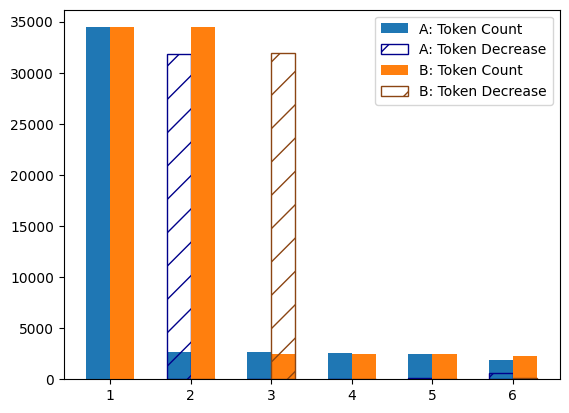

In [25]:
# A
x = np.arange(0.7, len(tokenCount["A"])+0.7, 1)

plt.bar(
    x,
    tokenCount["A"],
    width=0.3,
    align="edge"
)


y = []
for i in range(1, len(tokenCount["A"])):
    y.append(tokenCount["A"][i-1] - tokenCount["A"][i])
    
x = np.arange(1.7, len(y)+1.7, 1)

plt.bar(
    x,
    y,
    width=0.3,
    align="edge",
    color="none",
    hatch="/",
    edgecolor="darkblue"
)

# B
x = np.arange(1, len(tokenCount["B"])+1, 1)

plt.bar(
    x,
    tokenCount["B"],
    width=0.3,
    align="edge"
)

y = []
for i in range(1, len(tokenCount["B"])):
    y.append(tokenCount["B"][i-1] - tokenCount["B"][i])

x = np.arange(2, len(y)+2, 1)

plt.bar(
    x,
    y,
    width=0.3,
    align="edge",
    color="none",
    hatch="/",
    edgecolor="saddlebrown"
)

plt.legend(labels=["A: Token Count", "A: Token Decrease", "B: Token Count", "B: Token Decrease"])

for key, value in tokenCount.items():
    if(key == "2"): break
    print(f"1.{key}:")
    for i in range(len(value)):
        print(f"\t{i+1}: {value[i]} tokens", end="")
        if(i > 0):
            print(f" (- {value[i-1] - value[i]})")
        else:
            print()


**1.C:** Part B (lemmatization) results in the better list of tokens. Not only does it include more overall information (parts of speech), but the end result has less tokens overall since most unimportant words (i.e: prepositions) are removed. In addition to that, the stemming in part A results in some very strange words after stemming, such as changing "Alice" to "Alic" or "little" to "littl".

## 1.D

**1.D**: It could be useful to use the token frequencies to remove tokens that only appear once or twice in the text. These words are very unimportant to the subject matter. Therefore extraneous information would be removed, shortening the token list.

In [219]:
partAFinal = {
    key: value
        for key, value in stemTokens.items()
            if(value > 1)
}
tokenCount["A"].append(len(partAFinal))

print(f"Part A: {len(partAFinal)} unique tokens")

partBFinal = {
    key: value
        for key, value in lemmatizedFiltered.items()
            if(value > 1)
}
tokenCount["B"].append(len(partBFinal))

print(f"Part B: {len(partBFinal)} unique tokens")

Part A: 1135 unique tokens
Part B: 1201 unique tokens


1.A:
	1: 34448 tokens
	2: 2625 tokens (- 31823)
	3: 2625 tokens (- 0)
	4: 2594 tokens (- 31)
	5: 2462 tokens (- 132)
	6: 1880 tokens (- 582)
	7: 1135 tokens (- 745)
1.B:
	1: 34448 tokens
	2: 34448 tokens (- 0)
	3: 2494 tokens (- 31954)
	4: 2494 tokens (- 0)
	5: 2474 tokens (- 20)
	6: 2305 tokens (- 169)
	7: 1201 tokens (- 1104)


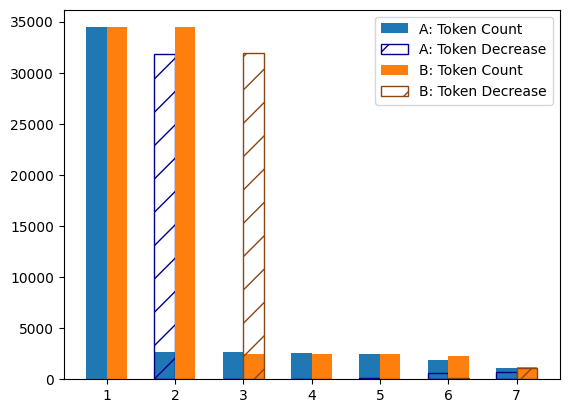

In [221]:
# A
x = np.arange(0.7, len(tokenCount["A"])+0.7, 1)

plt.bar(
    x,
    tokenCount["A"],
    width=0.3,
    align="edge"
)


y = []
for i in range(1, len(tokenCount["A"])):
    y.append(tokenCount["A"][i-1] - tokenCount["A"][i])
    
x = np.arange(1.7, len(y)+1.7, 1)

plt.bar(
    x,
    y,
    width=0.3,
    align="edge",
    color="none",
    hatch="/",
    edgecolor="darkblue"
)

# B
x = np.arange(1, len(tokenCount["B"])+1, 1)

plt.bar(
    x,
    tokenCount["B"],
    width=0.3,
    align="edge"
)

y = []
for i in range(1, len(tokenCount["B"])):
    y.append(tokenCount["B"][i-1] - tokenCount["B"][i])

x = np.arange(2, len(y)+2, 1)

plt.bar(
    x,
    y,
    width=0.3,
    align="edge",
    color="none",
    hatch="/",
    edgecolor="saddlebrown"
)

plt.legend(labels=["A: Token Count", "A: Token Decrease", "B: Token Count", "B: Token Decrease"])

for key, value in tokenCount.items():
    if(key not in ["A", "B"]): break
    print(f"1.{key}:")
    for i in range(len(value)):
        print(f"\t{i+1}: {value[i]} tokens", end="")
        if(i > 0):
            print(f" (- {value[i-1] - value[i]})")
        else:
            print()


This extra stepped greatly reduced both token lists without removing any important words

# 2: Use the `spacy` library to tokenize and lemmatize the same text

## 2.A: Use `spacy` to process the file and apply the processing steps
(Lowercase, remove stopwords & punctuation marks, lemmatize words)

In [223]:
! python -m spacy download en_core_web_sm

6604.54s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


2025-09-14 20:13:52.753841: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-14 20:13:52.782515: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-14 20:13:54.009106: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━

In [224]:
nlp = spacy.load("en_core_web_sm")

In [245]:
# Tokenize and lowercase

processed = nlp(txt.lower())

tokenCount["2"] = [len(processed)]

print(f"{len(processed)} tokens found.")

37965 tokens found.


In [246]:
# Get unique tokens & frequencies, etc.

#0=token, 1=pos, 2=lemma, 3=is stop word, 4=is punctuation
processedArr = [
    (str(token), str(token.pos_), str(token.lemma_), bool(token.is_stop), bool(token.is_punct))
        for token in processed
]

processedUnique = np.unique(processedArr, axis=0, return_counts=True)

processedFreq = {}
for i in range(len(processedUnique[0])):
    key = tuple(processedUnique[0][i])
    val = processedUnique[1][i]

    processedFreq[key] = val

processedFreq = sortByFrequency(processedFreq)

tokenCount["2"].append(len(processedFreq))

print(f"{len(processedFreq)} unique tokens found.\n")

print("\t10 most frequent words:")
for key in list(processedFreq.keys())[:10]:
    print(f"\t\t{(key[0], key[1])}: {processedFreq[key]}")

print("\n\t10 least frequent words:")
for key in list(processedFreq.keys())[-10:]:
    print(f"\t\t{(key[0], key[1])}: {processedFreq[key]}")


3102 unique tokens found.

	10 most frequent words:
		(',', 'PUNCT'): 2418
		('\n', 'SPACE'): 1750
		('the', 'DET'): 1639
		('`', 'PUNCT'): 1103
		("'", 'PUNCT'): 1080
		('.', 'PUNCT'): 972
		('and', 'CCONJ'): 869
		('\n\n  ', 'SPACE'): 731
		(' ', 'SPACE'): 682
		('a', 'DET'): 631

	10 least frequent words:
		('yawning', 'NOUN'): 1
		('yawning', 'VERB'): 1
		('ye', 'ADJ'): 1
		('years', 'NOUN'): 1
		('yelled', 'VERB'): 1
		('yelp', 'NOUN'): 1
		("you've", 'X'): 1
		('yours', 'PRON'): 1
		('zealand', 'PROPN'): 1
		('zigzag', 'NOUN'): 1


In [247]:
# Remove stop words
processedNoStop = {
    key: val
        for key, val in 
            processedFreq.items()
        if key[3] == 'False'
}

tokenCount["2"].append(len(processedNoStop))

print(f"{len(processedNoStop)} unique tokens found (after stop words removed).\n")

print("\t10 most frequent words:")
for key in list(processedNoStop.keys())[:10]:
    print(f"\t\t{(key[0], key[1])}: {processedNoStop[key]}")

print("\n\t10 least frequent words:")
for key in list(processedNoStop.keys())[-10:]:
    print(f"\t\t{(key[0], key[1])}: {processedNoStop[key]}")


2740 unique tokens found (after stop words removed).

	10 most frequent words:
		(',', 'PUNCT'): 2418
		('\n', 'SPACE'): 1750
		('`', 'PUNCT'): 1103
		("'", 'PUNCT'): 1080
		('.', 'PUNCT'): 972
		('\n\n  ', 'SPACE'): 731
		(' ', 'SPACE'): 682
		('said', 'VERB'): 456
		('!', 'PUNCT'): 446
		('alice', 'PROPN'): 320

	10 least frequent words:
		('yawned', 'VERB'): 1
		('yawning', 'NOUN'): 1
		('yawning', 'VERB'): 1
		('ye', 'ADJ'): 1
		('years', 'NOUN'): 1
		('yelled', 'VERB'): 1
		('yelp', 'NOUN'): 1
		("you've", 'X'): 1
		('zealand', 'PROPN'): 1
		('zigzag', 'NOUN'): 1


In [248]:
# Remove punctuation and white space
regex = r'[\!"#\$%&\'\(\)\*\+,\-\.\/\:;\<\=\>\?@\[\\\]\^_\`\{\|\}~\s]+'

processedNoPunc = {}
for key, val in processedNoStop.items():
    if(key[4] == 'True' or key[1] in ["SPACE", "PUNCT"]):
        continue
    else:
        # 0=token, 1=pos, 2=lemma
        newKey = (re.sub(regex, "", key[0]), key[1], re.sub(regex, "", key[2]))
        try:
            processedNoPunc[newKey] += val
        except:
            processedNoPunc[newKey] = val

tokenCount["2"].append(len(processedNoPunc))

print(f"{len(processedNoPunc)} unique tokens found (after punctuation removed).\n")

print("\t10 most frequent words:")
for key in list(processedNoPunc.keys())[:10]:
    print(f"\t\t{key[:2]}: {processedNoPunc[key]}")

print("\n\t10 least frequent words:")
for key in list(processedNoPunc.keys())[-10:]:
    print(f"\t\t{key[:2]}: {processedNoPunc[key]}")


2620 unique tokens found (after punctuation removed).

	10 most frequent words:
		('said', 'VERB'): 456
		('alice', 'PROPN'): 321
		('little', 'ADJ'): 127
		('know', 'VERB'): 88
		('went', 'VERB'): 82
		('queen', 'NOUN'): 75
		('time', 'NOUN'): 71
		('thought', 'VERB'): 69
		('king', 'NOUN'): 63
		('turtle', 'NOUN'): 59

	10 least frequent words:
		('yawned', 'VERB'): 1
		('yawning', 'NOUN'): 1
		('yawning', 'VERB'): 1
		('ye', 'ADJ'): 1
		('years', 'NOUN'): 1
		('yelled', 'VERB'): 1
		('yelp', 'NOUN'): 1
		('youve', 'X'): 1
		('zealand', 'PROPN'): 1
		('zigzag', 'NOUN'): 1


In [263]:
# Lemmatize
processedLemma = {}

for key, val in processedNoPunc.items():
    try:
        processedLemma[(key[2], key[1])] += val
    except:
        processedLemma[(key[2], key[1])] = val

tokenCount["2"].append(len(processedLemma))
processedLemma = sortByFrequency(processedLemma)

tokenCount["2"].append(len(processedLemma))

print(f"{len(processedLemma)} unique tokens found (after lemmatization).\n")

print("\t10 most frequent words:")
for key in list(processedLemma.keys())[:10]:
    print(f"\t\t{key}: {processedLemma[key]}")

print("\n\t10 least frequent words:")
for key in list(processedLemma.keys())[-10:]:
    print(f"\t\t{key}: {processedLemma[key]}")


2098 unique tokens found (after lemmatization).

	10 most frequent words:
		('say', 'VERB'): 475
		('alice', 'PROPN'): 321
		('think', 'VERB'): 131
		('go', 'VERB'): 129
		('little', 'ADJ'): 127
		('know', 'VERB'): 107
		('look', 'VERB'): 98
		('begin', 'VERB'): 91
		('come', 'VERB'): 89
		('thing', 'NOUN'): 79

	10 least frequent words:
		('xi', 'PROPN'): 1
		('xii', 'PROPN'): 1
		('yawned', 'ADJ'): 1
		('yawning', 'NOUN'): 1
		('ye', 'ADJ'): 1
		('yell', 'VERB'): 1
		('yelp', 'NOUN'): 1
		('youve', 'X'): 1
		('zealand', 'PROPN'): 1
		('zigzag', 'NOUN'): 1


1.A:
	1: 34448 tokens
	2: 2625 tokens (- 31823)
	3: 2625 tokens (- 0)
	4: 2594 tokens (- 31)
	5: 2462 tokens (- 132)
	6: 1880 tokens (- 582)
1.B:
	1: 34448 tokens
	2: 34448 tokens (- 0)
	3: 2494 tokens (- 31954)
	4: 2494 tokens (- 0)
	5: 2474 tokens (- 20)
	6: 2305 tokens (- 169)
2.A:
	1: 37965 tokens
	2: 3102 tokens (- 34863)
	3: 2740 tokens (- 362)
	4: 2620 tokens (- 120)
	5: 2098 tokens (- 522)
	6: 2098 tokens (- 0)


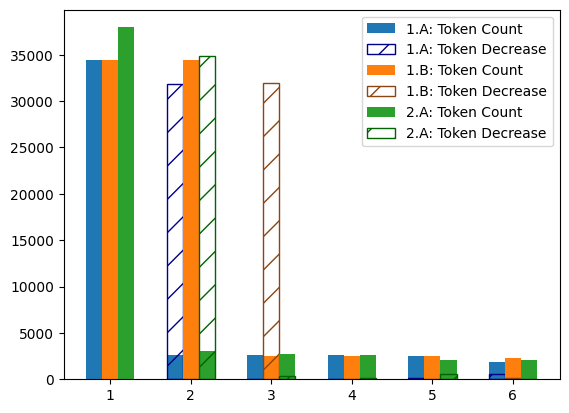

In [250]:
# A
x = np.arange(0.7, len(tokenCount["A"])+0.7, 1)

plt.bar(
    x[:-1],
    tokenCount["A"][:-1],
    width=0.2,
    align="edge"
)


y = []
for i in range(1, len(tokenCount["A"])):
    y.append(tokenCount["A"][i-1] - tokenCount["A"][i])
    
x = np.arange(1.7, len(y)+1.7, 1)

plt.bar(
    x[:-1],
    y[:-1],
    width=0.2,
    align="edge",
    color="none",
    hatch="/",
    edgecolor="darkblue"
)

# B
x = np.arange(1, len(tokenCount["B"])+1, 1)

plt.bar(
    x[:-1],
    tokenCount["B"][:-1],
    width=0.2,
    align="center"
)

y = []
for i in range(1, len(tokenCount["B"])):
    y.append(tokenCount["B"][i-1] - tokenCount["B"][i])

x = np.arange(2, len(y)+2, 1)

plt.bar(
    x[:-1],
    y[:-1],
    width=0.2,
    align="center",
    color="none",
    hatch="/",
    edgecolor="saddlebrown"
)



# 2

x = np.arange(1.1, len(tokenCount["2"])+1.1, 1)

plt.bar(
    x,
    tokenCount["2"],
    width=0.2,
    align="edge"
)

y = []
for i in range(1, len(tokenCount["2"])):
    y.append(tokenCount["2"][i-1] - tokenCount["2"][i])

x = np.arange(2.1, len(y)+2.1, 1)

plt.bar(
    x,
    y,
    width=0.2,
    align="edge",
    color="none",
    hatch="/",
    edgecolor="darkgreen"
)

plt.legend(labels=["1.A: Token Count", "1.A: Token Decrease", "1.B: Token Count", "1.B: Token Decrease", "2.A: Token Count", "2.A: Token Decrease"])

for key, value in tokenCount.items():
    if(key == "2"): break
    print(f"1.{key}:")
    for i in range(len(value)-1):
        print(f"\t{i+1}: {value[i]} tokens", end="")
        if(i > 0):
            print(f" (- {value[i-1] - value[i]})")
        else:
            print()

print(f"2.A:")
for i in range(len(tokenCount["2"])):
    print(f"\t{i+1}: {tokenCount['2'][i]} tokens", end="")
    if(i > 0):
        print(f" (- {tokenCount['2'][i-1] - tokenCount['2'][i]})")
    else:
        print()


## 2.B: Observations

**2.B:** Using spaCy produced a final token count greater than that of part 1.A, and less than that of part 1.B (not counting the additional final step). However, the initial token count is much higher due to the amount of whitespace strings that were counted as individual tokens. This caused the number of tokens removed in the first step to be greater than in the previous parts. It was much easier to perform these steps using spaCy, since it's builtin pipelines made it much easier to test for different attributes (ie: if a token was punctuation or a stop word)

## 2.C

There is a lot more information on the exact part of speech for each token in spacy. Using this, I will further remove unimportant words from the token list.

I use the dep_ attribute to get the exact part of speech. I don't know what most of the abbhreviations mean, so to better understand that I find the unique list of dep_ values for the remaining tokens, and how many unique (lemmatized) tokens are categorized under that value and none of the others. This lets me see which categories have less than 10 unique words in them. Any words in these categories, or that are not nouns, adjectives, verbs, or adverbs can be removed. I am also removing the tokens with a frequency of only 1, since that was also done in the first 2 parts.

In [251]:
processedFiltered = [
    token
        for token in processed
            if(not token.is_space and not token.is_punct and not token.is_stop)
                and token.pos_ not in ["SPACE", "PUNCT"]
]

In [252]:
posArr = np.unique(np.array([
    token.pos_.lower()
        for token in processedFiltered
]))
posArr

array(['adj', 'adp', 'adv', 'aux', 'cconj', 'det', 'intj', 'noun', 'num',
       'pron', 'propn', 'sconj', 'verb', 'x'], dtype='<U5')

In [253]:
depArr = np.unique(np.array([
    token.dep_.lower()
        for token in processedFiltered
]))
depArr

array(['acl', 'acomp', 'advcl', 'advmod', 'amod', 'appos', 'attr', 'aux',
       'auxpass', 'cc', 'ccomp', 'compound', 'conj', 'csubj', 'dative',
       'dep', 'dobj', 'intj', 'mark', 'meta', 'nmod', 'npadvmod', 'nsubj',
       'nsubjpass', 'nummod', 'oprd', 'parataxis', 'pcomp', 'pobj',
       'poss', 'preconj', 'predet', 'prep', 'prt', 'punct', 'quantmod',
       'relcl', 'root', 'xcomp'], dtype='<U9')

In [254]:
posDict = {
    "adj": "a",
    "adv": "v",
    "noun": "n",
    "propn": "n",
    "verb": "v"
}

In [255]:
depToRemove = []

print("dep categories to remove (and number of unique words):")

for dep in depArr:
    arr = np.unique(np.array(
    [
        re.sub(regex, "", token.lemma_)
            for token in processedFiltered
                if(token.dep_.lower() == dep)
    ]))

    arr2 = np.unique(np.array(
    [
        re.sub(regex, "", token.lemma_)
            for token in processedFiltered
                if(token.dep_.lower() != dep)
    ]))

    diff = [
        token
            for token in arr
                if(not token in arr2)
    ]
    if(len(diff) > 0 and len(diff) <= 10):
        depToRemove.append(dep)
        print(f"\t{dep}: {len(diff)}")
        #print(f"\t\t{diff[:10]}")


dep categories to remove (and number of unique words):
	acl: 7
	appos: 10
	aux: 4
	auxpass: 2
	csubj: 1
	dative: 1
	dep: 3
	intj: 4
	mark: 1
	meta: 1
	nmod: 4
	npadvmod: 8
	nummod: 4
	oprd: 6
	poss: 2
	prep: 4
	punct: 3
	relcl: 9


In [256]:
what = [
    token.pos_.lower()
        for token in processedFiltered
            if(token.dep)
]

In [257]:
finalTokenArr = np.unique(np.array([
    (re.sub(regex, "", token.lemma_), token.pos_.lower())
        for token in processedFiltered
            if(token.pos_.lower() in list(posDict.keys())
                and token.dep_.lower() not in depToRemove)
]), return_counts=True, axis=0)

finalTokenDict = {}

for i in range(len(finalTokenArr[0])):
    try:
        finalTokenDict[tuple(finalTokenArr[0][i])] += finalTokenArr[1][i]
    except:
        finalTokenDict[tuple(finalTokenArr[0][i])] = finalTokenArr[1][i]

finalTokenDict = sortByFrequency(finalTokenDict)

In [258]:
finalFinalTokenDict = {
    key: value
        for key, value in finalTokenDict.items()
            if(value > 1)
}

In [259]:
tokenCount["2"].append(len(finalFinalTokenDict))

print(f"{len(finalFinalTokenDict)} unique tokens found.\n")

print("\t10 most frequent words:")
for key in list(finalFinalTokenDict.keys())[:10]:
    print(f"\t\t{key}: {finalFinalTokenDict[key]}")

print("\n\t10 least frequent words:")
for key in list(finalFinalTokenDict.keys())[-10:]:
    print(f"\t\t{key}: {finalFinalTokenDict[key]}")

1021 unique tokens found.

	10 most frequent words:
		('say', 'verb'): 464
		('alice', 'propn'): 304
		('think', 'verb'): 127
		('go', 'verb'): 121
		('little', 'adj'): 112
		('know', 'verb'): 100
		('look', 'verb'): 94
		('begin', 'verb'): 85
		('come', 'verb'): 83
		('thing', 'noun'): 78

	10 least frequent words:
		('wild', 'adj'): 2
		('wildly', 'adv'): 2
		('wind', 'noun'): 2
		('wine', 'noun'): 2
		('wise', 'adj'): 2
		('woman', 'noun'): 2
		('wonder', 'noun'): 2
		('wonderful', 'adj'): 2
		('wretched', 'adj'): 2
		('yawn', 'verb'): 2


1.A:
	1: 34448 tokens
	2: 2625 tokens (- 31823)
	3: 2625 tokens (- 0)
	4: 2594 tokens (- 31)
	5: 2462 tokens (- 132)
	6: 1880 tokens (- 582)
	7: 1135 tokens (- 745)
1.B:
	1: 34448 tokens
	2: 34448 tokens (- 0)
	3: 2494 tokens (- 31954)
	4: 2494 tokens (- 0)
	5: 2474 tokens (- 20)
	6: 2305 tokens (- 169)
	7: 1201 tokens (- 1104)
2.A:
	1: 37965 tokens
	2: 3102 tokens (- 34863)
	3: 2740 tokens (- 362)
	4: 2620 tokens (- 120)
	5: 2098 tokens (- 522)
	6: 2098 tokens (- 0)
	7: 1021 tokens (- 1077)


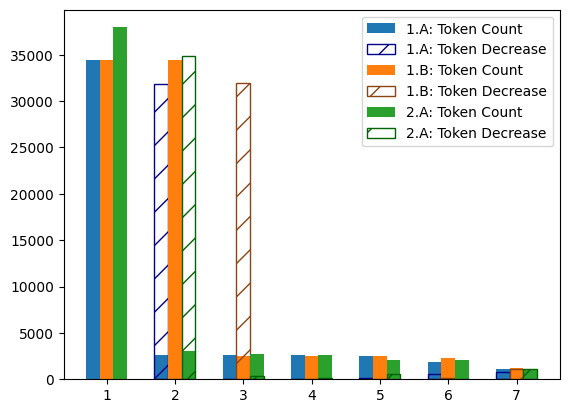

In [261]:
# A
x = np.arange(0.7, len(tokenCount["A"])+0.7, 1)

plt.bar(
    x,
    tokenCount["A"],
    width=0.2,
    align="edge"
)


y = []
for i in range(1, len(tokenCount["A"])):
    y.append(tokenCount["A"][i-1] - tokenCount["A"][i])
    
x = np.arange(1.7, len(y)+1.7, 1)

plt.bar(
    x,
    y,
    width=0.2,
    align="edge",
    color="none",
    hatch="/",
    edgecolor="darkblue"
)

# B
x = np.arange(1, len(tokenCount["B"])+1, 1)

plt.bar(
    x,
    tokenCount["B"],
    width=0.2,
    align="center"
)

y = []
for i in range(1, len(tokenCount["B"])):
    y.append(tokenCount["B"][i-1] - tokenCount["B"][i])

x = np.arange(2, len(y)+2, 1)

plt.bar(
    x,
    y,
    width=0.2,
    align="center",
    color="none",
    hatch="/",
    edgecolor="saddlebrown"
)



# 2

x = np.arange(1.1, len(tokenCount["2"])+1.1, 1)

plt.bar(
    x,
    tokenCount["2"],
    width=0.2,
    align="edge"
)

y = []
for i in range(1, len(tokenCount["2"])):
    y.append(tokenCount["2"][i-1] - tokenCount["2"][i])

x = np.arange(2.1, len(y)+2.1, 1)

plt.bar(
    x,
    y,
    width=0.2,
    align="edge",
    color="none",
    hatch="/",
    edgecolor="darkgreen"
)

plt.legend(labels=["1.A: Token Count", "1.A: Token Decrease", "1.B: Token Count", "1.B: Token Decrease", "2.A: Token Count", "2.A: Token Decrease"])

for key, value in tokenCount.items():
    if(key == "2"): break
    print(f"1.{key}:")
    for i in range(len(value)):
        print(f"\t{i+1}: {value[i]} tokens", end="")
        if(i > 0):
            print(f" (- {value[i-1] - value[i]})")
        else:
            print()

print(f"2.A:")
for i in range(len(tokenCount["2"])):
    print(f"\t{i+1}: {tokenCount['2'][i]} tokens", end="")
    if(i > 0):
        print(f" (- {tokenCount['2'][i-1] - tokenCount['2'][i]})")
    else:
        print()


By further analyzing the parts of speech, as well as removing words with a frequency of 1 again, the list of tokens is now shorter than the final token lists from both previous parts.